In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from astropy import units as u
from astropy.coordinates import SkyCoord

!pip install astroquery #esto para instalar astroquery
from astroquery.gaia import Gaia 
#from google.colab import drive
#drive.mount('/content/gdrive')

     |████████████████████████████████| 4.2MB 2.9MB/s 
     |████████████████████████████████| 61kB 22.7MB/s 
     |████████████████████████████████| 2.3MB 38.1MB/s 
     |████████████████████████████████| 102kB 31.3MB/s 
  Stored in directory: /root/.cache/pip/wheels/8a/d1/1e/4124d9ef35e2bbfbaa284c97dd49d9babbab42d966c4bea190
Successfully built astroquery
Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


In [0]:
"""
job = Gaia.launch_job_async("select top 100000 \
solution_id,random_index,source_id,ra,dec,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,bp_g,g_rp,teff_val,lum_val,radius_val \
from gaiadr2.gaia_source order by random_index") #obtenemos los datos de 1000000 estrellas con los anteriores atributos en un Asynchronous query

print(job) 
r = job.get_results()
print(r)
"""

'\njob = Gaia.launch_job_async("select top 100000 solution_id,random_index,source_id,ra,dec,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,bp_g,g_rp,teff_val,lum_val,radius_val from gaiadr2.gaia_source order by random_index") #obtenemos los datos de 1000000 estrellas con los anteriores atributos en un Asynchronous query\n\nprint(job) \nr = job.get_results()\nprint(r)\n'

In [0]:
"""
jobpd=r.to_pandas() #convertimos el job a pandas
jobpd[:10] #vemos las primeras 10 filas para ver que todo está bien
"""

'\njobpd=r.to_pandas() #convertimos el job a pandas\njobpd[:10] #vemos las primeras 10 filas para ver que todo está bien\n'

In [0]:
"""
pd.Series.count(jobpd.iloc[:,11]) #con esto obtenemos el número de estrellas que poseen info de teff_val
datamask = np.logical_not(np.isnan(jobpd.iloc[:,11]))

filtdata=jobpd.loc[datamask]

filtdata['class'] = 'A' #esto se arregla en la celda de abajo

filtdata
"""

"\npd.Series.count(jobpd.iloc[:,11]) #con esto obtenemos el número de estrellas que poseen info de teff_val\ndatamask = np.logical_not(np.isnan(jobpd.iloc[:,11]))\n\nfiltdata=jobpd.loc[datamask]\n\nfiltdata['class'] = 'A' #esto se arregla en la celda de abajo\n\nfiltdata\n"

In [0]:
"""
maskO = (filtdata["teff_val"]>=33000)
filtdata.loc[maskO,'class'] = 'O'
maskB = (filtdata["teff_val"]>=10000) & (filtdata["teff_val"]<33000)
filtdata.loc[maskB,'class'] = 'B'
maskA = (filtdata["teff_val"]>=7500) & (filtdata["teff_val"]<10000)
filtdata.loc[maskA,'class'] = 'A'
maskF = (filtdata["teff_val"]>=6000) & (filtdata["teff_val"]<7500)
filtdata.loc[maskF,'class'] = 'F'
maskG = (filtdata["teff_val"]>=5200) & (filtdata["teff_val"]<6000)
filtdata.loc[maskG,'class'] = 'G'
maskK = (filtdata["teff_val"]>=3700) & (filtdata["teff_val"]<5200)
filtdata.loc[maskK,'class'] = 'K'
maskM = (filtdata["teff_val"]<3700)
filtdata.loc[maskM,'class'] = 'M'

filtdata
"""

'\nmaskO = (filtdata["teff_val"]>=33000)\nfiltdata.loc[maskO,\'class\'] = \'O\'\nmaskB = (filtdata["teff_val"]>=10000) & (filtdata["teff_val"]<33000)\nfiltdata.loc[maskB,\'class\'] = \'B\'\nmaskA = (filtdata["teff_val"]>=7500) & (filtdata["teff_val"]<10000)\nfiltdata.loc[maskA,\'class\'] = \'A\'\nmaskF = (filtdata["teff_val"]>=6000) & (filtdata["teff_val"]<7500)\nfiltdata.loc[maskF,\'class\'] = \'F\'\nmaskG = (filtdata["teff_val"]>=5200) & (filtdata["teff_val"]<6000)\nfiltdata.loc[maskG,\'class\'] = \'G\'\nmaskK = (filtdata["teff_val"]>=3700) & (filtdata["teff_val"]<5200)\nfiltdata.loc[maskK,\'class\'] = \'K\'\nmaskM = (filtdata["teff_val"]<3700)\nfiltdata.loc[maskM,\'class\'] = \'M\'\n\nfiltdata\n'

In [0]:
"""
filtdata.to_csv("tabla_temperatura_y_tipo_espectral_(10mil).csv")
"""

'\nfiltdata.to_csv("tabla_temperatura_y_tipo_espectral_(10mil).csv")\n'

In [0]:
data=pd.read_csv("https://raw.githubusercontent.com/astrodatos/proyecto_iluminatiuwu/master/tabla_temperatura_y_tipo_espectral_(100mil).csv")
#por temas de tiempo, puede ser mejor usar 10mil estrellas 

#atributos=['phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag','bp_rp','bp_g','g_rp','teff_val','lum_val','radius_val']
#sns.pairplot(data, hue = 'class', vars=atributos, diag_kind = 'hist')

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


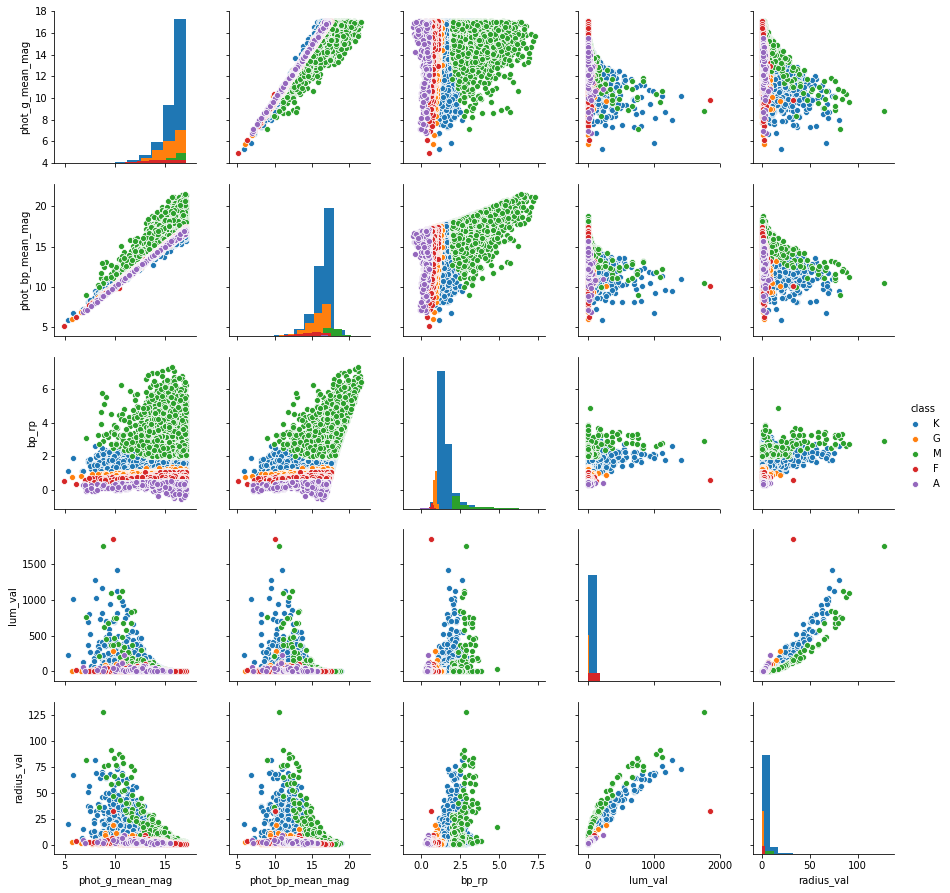

In [0]:
#Relaciones interesantes 
sns.pairplot(data[['phot_g_mean_mag', 'phot_bp_mean_mag','bp_rp', 'lum_val','radius_val', 'class']], hue = 'class',diag_kind = 'hist')

In [0]:
#clases = data10['class'].unique() 
#mapa = {}
#for clase, i in enumerate(clases):
    #mapa[i] = clase
#clases
#mapa #No salen las clases O y B en clases ni en mapa por alguna 
#extraña razón, por lo que tendremos que hacerlo a mano


clases = np.array(['O','B','A','F','G','K','M'], dtype=object)
mapa={'O':0,'B':1,'A':2,'F':3,'G':4,'K':5,'M':6}


#data
phot_g_mean_mag=data.iloc[:,6]
phot_bp_mean_mag=data.iloc[:,7]
phot_rp_mean_mag=data.iloc[:,8]
bp_rp=data.iloc[:,9]
bp_g=data.iloc[:,10]
g_rp=data.iloc[:,11]
teff_val=data.iloc[:,12]
lum_val=data.iloc[:,13]
radius_val=data.iloc[:,14]

#tabla = ('/content/gdrive/My Drive/Taller de proyecto/tabla_1millon.csv')
#tabla1millon=pd.read_csv(tabla)
#phot_g_mean_mag1M=tabla1millon.iloc[:,6]
#phot_bp_mean_mag1M=tabla1millon.iloc[:,7]
#phot_rp_mean_mag1M=tabla1millon.iloc[:,8]
#bp_rp1M=tabla1millon.iloc[:,9]
#bp_g1M=tabla1millon.iloc[:,10]
#g_rp1M=tabla1millon.iloc[:,11]
#teff_val1M=tabla1millon.iloc[:,12]
#lum_val1M=tabla1millon.iloc[:,13]
#radius_val1M=tabla1millon.iloc[:,14]

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, datasets 
from sklearn.datasets import make_classification
from sklearn.datasets import load_iris
from sklearn.svm import SVR
from sklearn.svm import SVC


In [9]:
datamaskL = np.logical_not(np.isnan(data.iloc[:,13]))

filtdataL=data.loc[datamaskL]

datamaskR = np.logical_not(np.isnan(filtdataL.iloc[:,14]))

filtdataR=filtdataL.loc[datamaskR]
filtdataR
pd.Series.count(filtdataR.iloc[:,14])



45361

In [0]:
datos = filtdataR.loc[:,['ra','dec','phot_g_mean_mag' ,'phot_bp_mean_mag','phot_rp_mean_mag','bp_rp','bp_g','g_rp','teff_val','lum_val','radius_val','class',]]


In [0]:
datos_noclass = datos.iloc[:,:-1]
num_class = np.array(datos['class'].map(mapa))

#datos_noclass
#num_class

In [20]:
# Guardamos la semilla para separar aleatoriamente los datos
rs = 1776

# Separamos el conjunto de entrenamiento y prueba usando scikit-learn y la semilla anterior
# Escogemos un conjunto de entrenamiento del 70% de las muestras y 30% de test
train_X, test_X, train_y, test_y = train_test_split(datos_noclass, num_class, test_size = 0.3, random_state = rs)

clf = RandomForestClassifier(n_estimators=100, max_depth=11,random_state=0)

clf.fit(train_X, train_y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=11, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

array([[0.00000000e+00, 0.00000000e+00, 1.00472144e-02, 9.89952206e-01,
        5.79777365e-07],
       [0.00000000e+00, 1.43999906e-03, 9.98431418e-01, 1.28583215e-04,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.48144712e-05, 9.99963812e-01,
        1.13730855e-05],
       ...,
       [0.00000000e+00, 0.00000000e+00, 1.73933210e-05, 9.99971234e-01,
        1.13730855e-05],
       [0.00000000e+00, 9.94878205e-01, 5.12179487e-03, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.73933210e-05, 9.99982027e-01,
        5.79777365e-07]])

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
def XVFeatureImportance(data,clases,num):
  largo = len(data.iloc[0,:])
  vector = np.zeros(largo)
  scores = 0
  std = np.array([])
  clf = RandomForestClassifier(n_estimators=100, max_depth = largo, random_state = num)
  
  for seed in np.random.randint(1000000,size = num):
    train_X, test_X, train_y, test_y = train_test_split(data, clases, test_size = 0.3, random_state = seed)
    clf.fit(train_X, train_y)
    vector += clf.feature_importances_ 
    scores += clf.score(test_X, test_y)
    std = np.append(std,np.array(clf.score(test_X, test_y)))
  vector = vector*(1/float(num))
  scores = scores/float(num)
  vector = np.append(vector,np.array(["Score: " + str(scores)]))
  dve = np.std(std)
  vector = np.append(vector,"Desviación Estándar:" + str(dve))
  return vector


In [36]:
XVFeatureImportance(datos_noclass,num_class,25)

#Notamos que la temperatura es lo más importante

array(['0.000584090245446562', '0.0006361320789733895',
       '0.003694775239238572', '0.008682356574078237',
       '0.0010937969220339945', '0.2911561441199245',
       '0.14034618989882508', '0.14872576102925644', '0.3895784537287612',
       '0.010552084318653805', '0.004950215844808207',
       'Score: 0.9998765522815785',
       'Desviación Estándar:0.00010333394566095218'], dtype='<U42')

In [0]:

#Vamos a hacer 5 casos, con t, sin t, solo con t, sin cosas luminicas, solo con luz
#Explicar porqué estos casos son importantes


#Ahora veremos que pasa SIN la temperatura#

In [37]:
#sin temperatura
datosnt = datos.loc[:,['ra','dec','phot_g_mean_mag' ,'phot_bp_mean_mag','phot_rp_mean_mag','bp_rp','bp_g','g_rp','lum_val','radius_val','class',]]
datosnt_noclass = datosnt.iloc[:,:-1]
XVFeatureImportance(datosnt_noclass,num_class,25)


array(['0.0034121918468509524', '0.003571265034818798',
       '0.0077905590484404425', '0.01569636857352761',
       '0.005385708030443827', '0.410388449796542', '0.2465322642146241',
       '0.26582328116244236', '0.02380748341242411',
       '0.017592428879885665', 'Score: 0.9700933205966636',
       'Desviación Estándar:0.0013100204099091204'], dtype='<U41')

In [38]:
#solo temperatura
datost = filtdataR.loc[:,['teff_val','class']]
datost_noclass = datost.iloc[:,:-1]
XVFeatureImportance(datost_noclass,num_class,25)

array(['1.0', 'Score: 0.9291909765596297',
       'Desviación Estándar:0.002043545938555984'], dtype='<U40')

In [39]:
#Sin luz
datosnL = filtdataR.loc[:,['ra','dec','radius_val','class',]]
datosnL_noclass = datosnL.iloc[:,:-1]
XVFeatureImportance(datosnL_noclass,num_class,25)

array(['0.24495835183211742', '0.12039859281471152', '0.6346430553531711',
       'Score: 0.6496700712763612',
       'Desviación Estándar:0.00436606375591442'], dtype='<U39')

In [40]:
#Solo luz
datosL = filtdataR.loc[:,['phot_g_mean_mag' ,'phot_bp_mean_mag','phot_rp_mean_mag','bp_rp','bp_g','g_rp','lum_val','class',]]
datosL_noclass = datosL.iloc[:,:-1]
XVFeatureImportance(datosL_noclass,num_class,25)

array(['0.005605389182959868', '0.020428425373451114',
       '0.004036174990034152', '0.3472062948983918', '0.3075202927668715',
       '0.2827933635157772', '0.03241005927251443',
       'Score: 0.9572194871041225',
       'Desviación Estándar:0.0014700565140914083'], dtype='<U41')

In [41]:
#Color
datosColor = filtdataR.loc[:,['bp_rp','bp_g','g_rp','class']]
datosColor_noclass = datosColor.iloc[:,:-1]
XVFeatureImportance(datosColor_noclass,num_class,25)

array(['0.34085970132412585', '0.3721481164162891', '0.28699218225958506',
       'Score: 0.9516731574693218',
       'Desviación Estándar:0.0016286524878092303'], dtype='<U41')

In [42]:
#Banda
datosBanda = filtdataR.loc[:,['phot_g_mean_mag' ,'phot_bp_mean_mag','phot_rp_mean_mag','class',]]
datosBanda_noclass = datosBanda.iloc[:,:-1]
XVFeatureImportance(datosBanda_noclass,num_class,25)

array(['0.30016137313656727', '0.5030976824511575', '0.19674094441227527',
       'Score: 0.6702975971783378',
       'Desviación Estándar:0.005276592479216836'], dtype='<U40')